<a href="https://colab.research.google.com/github/EduardoAcostaC/Simulacion-I/blob/main/MetodoBoxMuller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Justificación del Método Box-Muller para Generación de Normales Estándar

### 1. **Transformación de Variables Aleatorias**
- **Entrada:** Dos variables aleatorias independientes $ U_1 $ y $ U_2 $, distribuidas uniformemente en $ (0, 1) $.
- **Transformación:**  
  Se definen $ X_1 $ y $ X_2 $ como:  
  $
  X_1 = \sqrt{-2 \log U_1} \cdot \cos(2\pi U_2), \quad X_2 = \sqrt{-2 \log U_1} \cdot \sin(2\pi U_2).
  $
- **Propósito:** Convertir variables uniformes en normales estándar mediante coordenadas polares.

---

### 2. **Distribución Conjunta de $ X_1 $ y $ X_2 $**
- **Paso clave:**  
  - $ R = \sqrt{-2 \log U_1} $ sigue una distribución relacionada con Chi-cuadrado (exponencial).  
  - $ \Theta = 2\pi U_2 $ es uniforme en $ [0, 2\pi] $.  
- **Independencia:** $ R $ y $ \Theta $ son independientes, lo que facilita la generación de $ X_1 $ y $ X_2 $.

---

### 3. **Jacobiano de la Transformación**
- **Transformación inversa:**  
  $
  U_1 = e^{-(X_1^2 + X_2^2)/2}, \quad U_2 = \frac{1}{2\pi} \arctan\left(\frac{X_2}{X_1}\right).
  $
- **Densidad conjunta:**  
  El Jacobiano asegura que:  
  $
  f(X_1, X_2) = \frac{1}{2\pi} e^{-(X_1^2 + X_2^2)/2} = f(X_1) \cdot f(X_2),
  $  
  demostrando que $ X_1 $ y $ X_2 $ son normales estándar independientes.

---

### 4. **Motivación Geométrica**
- **Simetría radial:** La densidad normal bivariada depende solo de $ r = \sqrt{X_1^2 + X_2^2} $.  
- **Ángulo uniforme:** $ \Theta $ se distribuye uniformemente en $ [0, 2\pi] $.  
- **Chi-cuadrado:** $ R^2 = X_1^2 + X_2^2 $ sigue una distribución exponencial (Chi-cuadrado con 2 grados de libertad).  
- **Inversión:** El método revierte este proceso para generar $X_1 $ y $ X_2 $ a partir de $ U_1 $ y $ U_2 $.

=== Resultados Empíricos ===
Media calculada: -0.000490
Desviación estándar calculada: 0.999837

=== Resultados Teóricos ===
Media teórica: 0
Desviación estándar teórica: 1


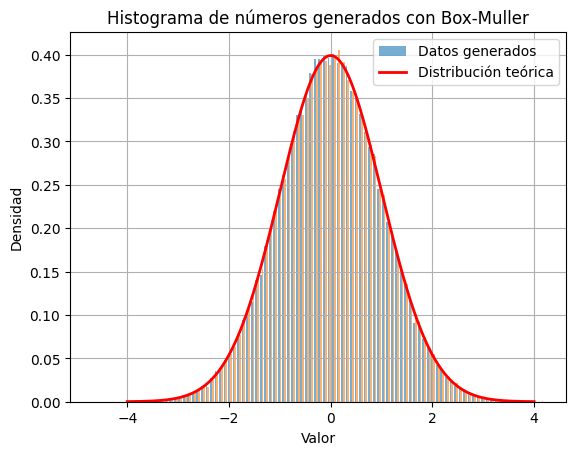

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

def f():
    u1 = rd.uniform(0, 1)
    u2 = rd.uniform(0, 1)
    R = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    return x, y

def experimento(n):
    lista_x = []
    lista_y = []
    for i in range(n):
        x, y = f()
        lista_x.append(x)
        lista_y.append(y)
    return lista_x, lista_y


n = 100000
prueba = experimento(n)

media = np.mean(prueba)
desviacion = np.std(prueba)

media_teorica = 0
desviacion_teorica = 1

# Resultados
print("=== Resultados Empíricos ===")
print(f"Media calculada: {media:.6f}")
print(f"Desviación estándar calculada: {desviacion:.6f}")
print("\n=== Resultados Teóricos ===")
print(f"Media teórica: {media_teorica}")
print(f"Desviación estándar teórica: {desviacion_teorica}")

# Histograma
plt.hist(prueba, bins=100, density=True, alpha=0.6, label='Datos generados')

x = np.linspace(-4, 4, 1000)
y = (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)
plt.plot(x, y, 'r-', linewidth=2, label='Distribución teórica')

plt.title('Histograma de números generados con Box-Muller')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()